<a id='top'></a>
<img height="100" width="100" src="https://scontent.fdet1-1.fna.fbcdn.net/v/t1.0-1/p720x720/18057791_1262701620517693_576022405593501900_n.jpg?_nc_cat=110&_nc_ht=scontent.fdet1-1.fna&oh=8a1d43639450004822acc791b450fe23&oe=5CD31E34">

<center>
    <h2>Data Science for Digital Marketing</h2>
    <h1>Coursework 4</h1>
    <h2>Machine Learning and Your Own Organisation</h2>
    <h4>Student: Marcelo Mendonca</h4>
    <h4>Jan/2019</h4>
</center>

<h4>Table of Contents</h4>
<ol>
    <li><a href='#section1'>Introduction</a></li>
    <li><a href='#section2'>Collecting Data</a></li>
    <li><a href='#section3'>Ethical Considerations</a></li>
    <li><a href='#section4'>Checking and Cleaning Data</a></li>
    <li><a href='#section5'>Algorithm Selection</a></li>
    <li><a href='#section6'>Evaluation and Analysis</a></li>
    <li><a href='#section7'>Communicating Results</a></li>    
</ol>

<a id='section1'></a>
# 1. Introduction

The aim of this report is to go through the end-to-end process of applying a machine learning algorithm within the context of a business organisation.

Note: Because I work for a large organisation (and not in the marketing team), it was very difficult for me to have access to marketing data. I have learned that getting access to data can be a particularly daunting task in machine learning projects. As a result, I have decided to use a public marketing dataset for this exercise.

**The challenge:**
One of the biggest challenges of any business is to grow their business through effective marketing. As a Marketing manager, you want to understand your customers, what they want and what really drives them, so that you can sell to them more effectively.

In this report, I propose the application of Machine Learning to **predict the performance of email marketing campaigns** in the Western Pacific states in US.

<a href='#top'>Go to top</a>

<a id='section2'></a>
# 2. Collecting Data

In [1]:
import pandas as pd

In [2]:
df= pd.read_excel('PacificWest_Full.xlsx')

#### In this public dataset, we have 9,104 rows and 23 columns with both categorical and numerical data. 

 - 22 features which are the descriptive attributes of each customer such as Marital Status, Gender, Lifetime Value, etc
 - 1 label (column "Response") which indicates whether or not the customer responded to the campaign. This is what we are trying to predict. 

In [4]:
caption = 'This table shows the first 5 rows in the dataset.'
df.head().style.set_caption(caption)

,Customer ID,State,Location Code,Gender,Marital Status,Education,Employment Status,Income (USD),Customer Lifetime Value (USD),Coverage,Monthly Premium Auto (USD),Number of Policies,Policy Type,Policy,Months Since Policy Inception,Months Since Last Claim,Sales Channel,Response,Renew Offer Type,Number of Open Complaints,Total Claim Amount (USD),Vehicle Class,Vehicle Size
0,BU79786,Washington,Suburban,F,Married,Bachelor,Employed,56274,2763.52,Basic,69,1,Corporate Auto,Corporate L3,5,32,Agent,No,Offer1,0,384.811,Two-Door Car,Medsize
1,QZ44356,Arizona,Suburban,F,Single,Bachelor,Unemployed,0,6979.54,Extended,94,8,Personal Auto,Personal L3,42,13,Agent,No,Offer3,0,1131.46,Four-Door Car,Medsize
2,AI49188,Nevada,Suburban,F,Married,Bachelor,Employed,48767,12887.4,Premium,108,2,Personal Auto,Personal L3,38,18,Agent,No,Offer1,0,566.472,Two-Door Car,Medsize
3,WW63253,California,Suburban,M,Married,Bachelor,Unemployed,0,7645.86,Basic,106,7,Corporate Auto,Corporate L2,65,18,Call Center,No,Offer1,0,529.881,SUV,Medsize
4,HB64268,Washington,Rural,M,Single,Bachelor,Employed,43836,2813.69,Basic,73,1,Personal Auto,Personal L1,44,12,Agent,No,Offer1,0,138.131,Four-Door Car,Medsize


<a href='#top'>Go to top</a>

<a id='section3'></a>
# 3. Ethical Considerations

This machine learning algorithm is using the customer’s personal data to make predictions about whether they are likely to respond to a given email marketing campaign. As a result, we need to take both the legal and ethical aspects into account.

#### Legal:
Since the organization and all its customers are in the USA and we do not process personal data of any individual residing in the EU when the data is accessed, GDPR does not apply.

Data privacy is not highly legislated or regulated in the U.S. Although partial regulations exist, there is no all-encompassing law regulating the acquisition, storage, or use of personal data.

As we have customers in California, it is important to consider the new law, the California Consumer Privacy Act, A.B. 375. We can find the bill's text here: https://leginfo.legislature.ca.gov/faces/billTextClient.xhtml?bill_id=201720180AB375

This law gives California residents the right to be informed about what kinds of personal data companies have collected and why it was collected. It also stipulates that consumers have the right to request the deletion of personal information, opt out of the sale of personal information, and access the personal information in a “readily useable format” that enables its transfer to third parties without hindrance.

The recommendation is to clearly describe in the car insurance policy what kind of data will be collected, how the data will be used and finally get the customer's consent.

#### Ethical

The main objective of this machine learning algorithm is to maximise the email marketing campaign conversion rate by sending the emails to a population that is more likely to respond to a given offer.

In my opinion this is an ethical application of machine learning:
- It will improve the experience of customers who are not likely to respond, they will not receive unnecessary emails
- For the customers who are considering a new insurance policy, receiving an extra incentive will be beneficial

<a href='#top'>Go to top</a>

<a id='section4'></a>
# 4. Checking and Cleaning Data

In [5]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
import seaborn as sns

We will perform a simple EDA (Exploratory Data Analysis) to understand some aspects about our data such as:
- 4.1) Data Type (Categorical vs Numerical)
- 4.2) Null values
- 4.3) Basic Statistical Details
- 4.4) Categorical data distribution analysis
- 4.5) Numerical data distribution and correlation analysis

#### 4.1) Data Types

As we can see in the following two tables, the majority of our features are categorical (object). Later on, we will explore the impact of the data type in the classification model.

In [6]:
caption = 'This table shows the name of each column and the corresponding data type.'
df.dtypes.to_frame(name='Data Type').style.set_caption(caption)

,Data Type
Customer ID,object
State,object
Location Code,object
Gender,object
Marital Status,object
Education,object
Employment Status,object
Income (USD),int64
Customer Lifetime Value (USD),float64
Coverage,object


In [7]:
df.columns.to_series().groupby(df.dtypes).count().sort_values(ascending=False).to_frame(name='Count')

,Count
object,15
int64,6
float64,2


#### 4.2) Null Values

The table below shows the total number of null values for each column. This dataset does not contain any null value.

In [8]:
df.isnull().sum().to_frame(name='Null Values').style.background_gradient(cmap='summer')

,Null Values
Customer ID,0
State,0
Location Code,0
Gender,0
Marital Status,0
Education,0
Employment Status,0
Income (USD),0
Customer Lifetime Value (USD),0
Coverage,0


#### 4.3) Basic Statistical Details

We can use Pandas describe() function to view some basic statistical details like percentile, min, max, mean of our dataset.

In [9]:
df.describe(include="all")

,Customer ID,State,Location Code,Gender,Marital Status,Education,Employment Status,Income (USD),Customer Lifetime Value (USD),Coverage,...,Policy,Months Since Policy Inception,Months Since Last Claim,Sales Channel,Response,Renew Offer Type,Number of Open Complaints,Total Claim Amount (USD),Vehicle Class,Vehicle Size
count,9104,9104,9104,9104,9104,9104,9104,9104.000000,9104.000000,9104,...,9104,9104.000000,9104.000000,9104,9104,9104,9104.000000,9104.000000,9104,9104
unique,9104,5,3,2,3,5,5,NaN,NaN,3,...,9,NaN,NaN,4,2,4,NaN,NaN,6,3
top,TA58285,California,Suburban,F,Married,Bachelor,Employed,NaN,NaN,Basic,...,Personal L3,NaN,NaN,Agent,No,Offer1,NaN,NaN,Four-Door Car,Medsize
freq,1,3135,5757,4640,5278,2739,5678,NaN,NaN,5556,...,3421,NaN,NaN,3465,7806,3739,NaN,NaN,4605,6404
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37652.561951,8008.014745,NaN,...,NaN,48.061182,15.085127,NaN,NaN,NaN,0.384117,433.874388,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30384.257187,6879.290711,NaN,...,NaN,27.908985,10.074887,NaN,NaN,NaN,0.909973,290.203677,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1898.007675,NaN,...,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.099007,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,3990.182288,NaN,...,NaN,24.000000,6.000000,NaN,NaN,NaN,0.000000,272.211686,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33880.000000,5780.182197,NaN,...,NaN,48.000000,14.000000,NaN,NaN,NaN,0.000000,383.793548,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62293.750000,8963.674431,NaN,...,NaN,71.000000,23.000000,NaN,NaN,NaN,0.000000,547.200000,NaN,NaN


#### 4.4) Categorical data distribution analysis

For categorical columns, we can plot bar graphs, which are commonly used for representing categorical data using rectangular bars with value counts of the categorical values.

Using the charts below, we can make some observations:
- In the **Response** chart, we can see a significant level of class imbalance, which is when each class does not make up an equal portion of a dataset. In our case, around 85% of the customers did not respond to the campaign.
- As per the **Employment Status** chart, we can see that the majority of employed customers did not respond to the campaign. On the other hand, most retired customers did respond to the campaign.
- Most customers live in **suburban** area
- **Offer 3** and **Offer 4** are not very popular, they had a very small response rate.

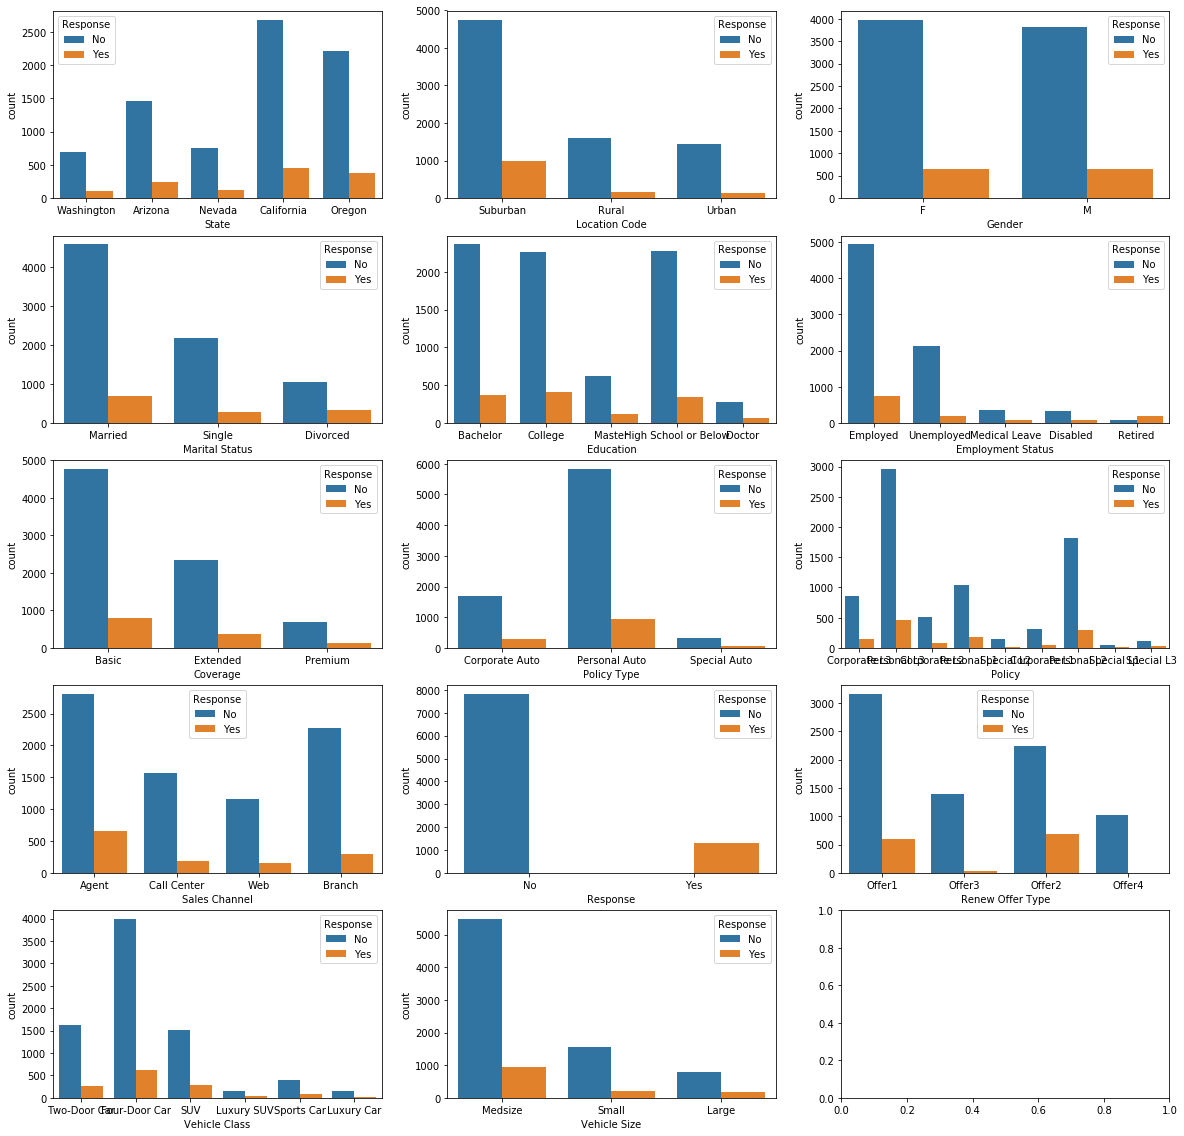

In [10]:
cat_index = 0
ROWS = 5
COLUMNS = 3

df_cat = df.select_dtypes(include=[object]).drop(['Customer ID'], axis=1)
col_names = df_cat.columns.tolist()

f,ax=plt.subplots(ROWS,COLUMNS,figsize=(20,20))

for row in range(0,ROWS):
    for column in range(0,COLUMNS):
        if cat_index < 14:
            sns.countplot(col_names[cat_index],hue='Response',data=df_cat,ax=ax[row,column])
            cat_index = cat_index + 1
        
plt.show()

#### 4.5) Numerical data distribution and correlation analysis

In order to analyse our numerical data columns, we will use pairs plot, which allows us to see both distribution of single variables and relationships between two variables.

Using the charts below, we can make some observations:
- There is a strong relationship between **Monthly Premium Auto** and **Total Claim Amount**
- Customers with lower **Customer Lifetime Value** seem to respond better to the campaign. The majority of positive responses (Yes) are from customers with CLV between 0 and 20,000 USD
- **Months Since Policy Inception** is not a good indicative of positive response
- The lower the **Number of Open Complaints**, the higher the number of positive responses.

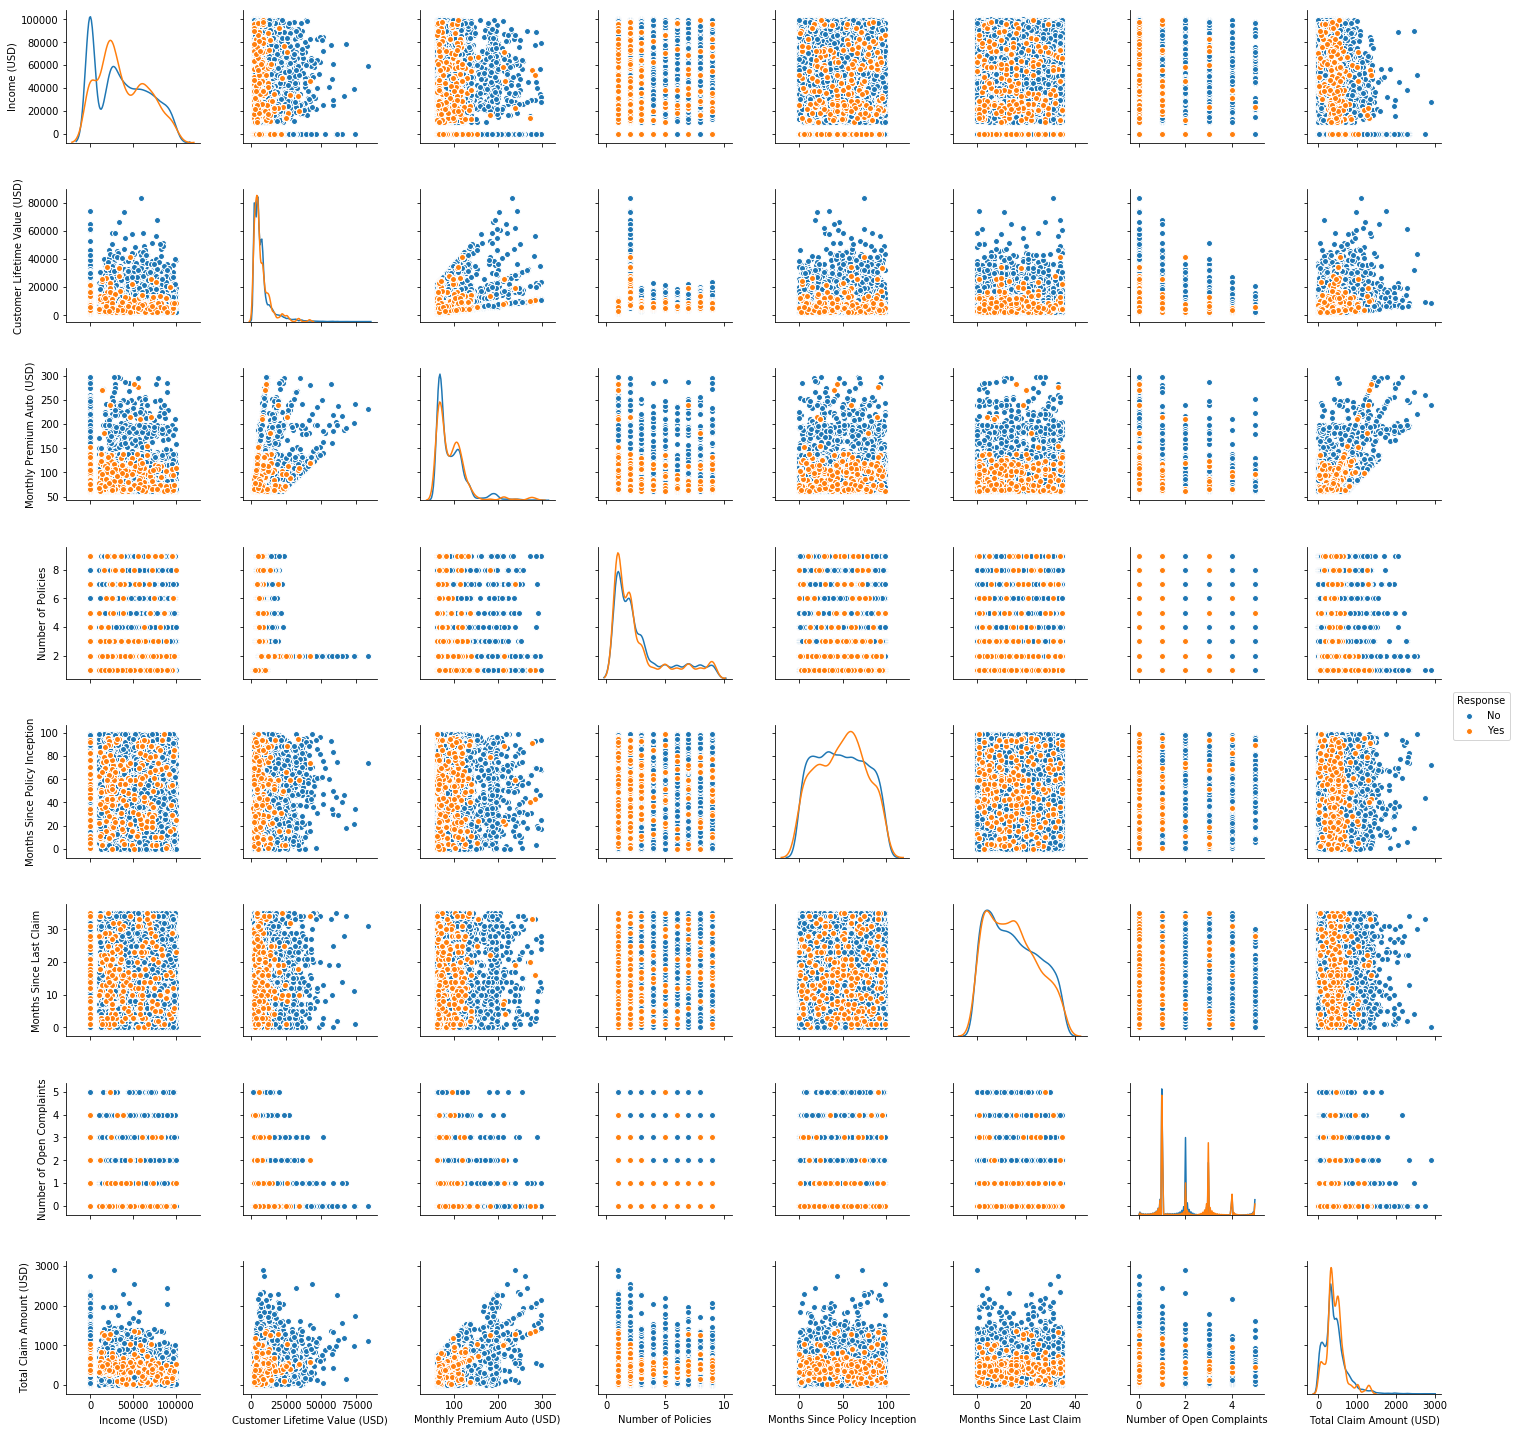

In [11]:
sns.pairplot(df, diag_kind="kde", hue="Response");

In the Correlation heatmap below, we can also see the strong correlation between **Monthly Premium Auto** and **Total Claim Amount**.

- **POSITIVE CORRELATION**: If an increase in feature A leads to increase in feature B, then they are positively correlated. A value 1 means perfect positive correlation. <br>
- **NEGATIVE CORRELATION**: If an increase in feature A leads to decrease in feature B, then they are negatively correlated. A value -1 means perfect negative correlation.

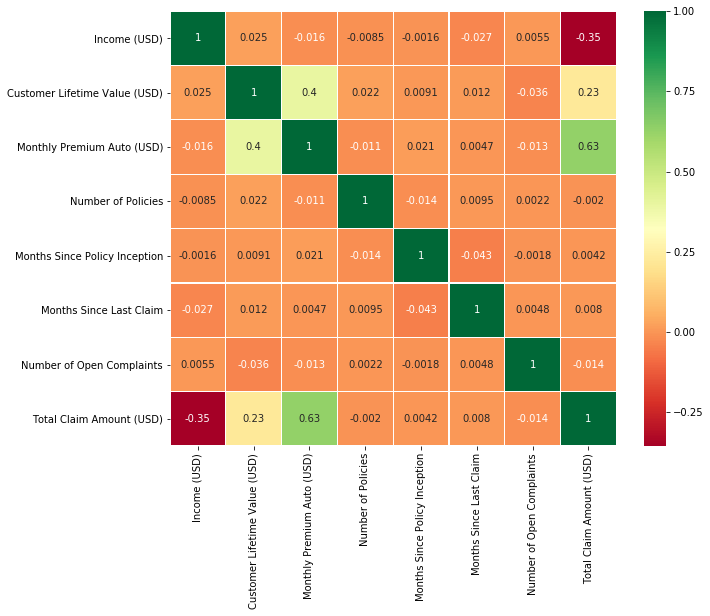

In [12]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

<a href='#top'>Go to top</a>

<a id='section5'></a>
# 5. Algorithm Selection

In this course we have looked at three different ML algorithms:
- **Decision Trees** – are useful when you have a number of predefined outcomes that could happen, and you want to use data (that includes categorical data) about the situation to predict which one of those outcomes is most likely
- **Support Vector Machines** – are useful when you have two pre-defined outcomes that could happen, a number of factors that lead towards those outcomes, and you suspect there might be a linear relationship between the factors and the outcomes (i.e. the higher the factor the higher the likelihood of the outcome – or inverse). SVMs require numerical data about the situation.
- **Cluster Analyses** – are useful when you want to assign things into two or more categories, based on data you have about them (for example, to help you treat them differently)

The goal of this project is to predict the performance of email marketing campaigns. In order to accomplish that, we need to predict whether or not a customer will respond to the email and then, calculate the performance by dividing the number of responses by the total number of emails sent:

<div class="alert alert-block alert-info">
<b>Note:</b> We could also use the term "conversion rate" instead of performance.
</div>

$$performance=\frac{responses}{emails}\times100$$

For our prediction, we have two possible outcomes, either **Yes** or **No**. This is a binary classification problem from a machine learning perspective. We need to select an algorithm suitable for supervised learning. From the list above, we need to decide between Decision Trees or Support Vector Machines.<br><br>
I have decided to use the *Decision Trees* model due to the following reasons:
- **Easy to interpret and explain to executives:** Decision tree output is very easy to understand even for people from non-analytical background. It does not require any statistical knowledge to read and interpret them. Its graphical representation is very intuitive and users can easily relate their hypothesis.
- **Less data preparation required:** Transformations such as normalization or scaling to overcome scale differences between parameters are not required with  decision trees because the tree structure will remain the same with or without the transformation. In addition, missing values will not prevent splitting the data for building trees. Decision trees are also not sensitive to outliers since the splitting happens based on proportion of samples within the split ranges and not on absolute values.
- **Nonlinear relationships between parameters do not affect tree performance:** Decision trees do not require any assumptions of linearity in the data. 

<p style="text-align:center;"> Decision trees are easy to interpret. </p> <div style="text-align:center;"><img vspace="25" align="center" height="500" width="500" src="https://scikit-learn.org/stable/_images/iris.png">Source: https://scikit-learn.org/stable/modules/tree.html</div>

<a href='#top'>Go to top</a>

<a id='section6'></a>
# 6. Evaluation and Analysis

As the dimensionality increases, the classifier’s performance increases until the optimal number of features is reached. Further increasing the dimensionality without increasing the number of training samples results in a decrease in classifier performance.

In order to evaluate the impact of dimensionality in our decision tree, I implemented three classifiers:
- 6.1) Using only Categorical features
- 6.2) Using only Numerical features
- 6.3) Using both Categorical and Numerical features

#### Accuracy Paradox

*The accuracy paradox is the paradoxical finding that accuracy is not a good metric for predictive models when classifying in predictive analytics. This is because a simple model may have a high level of accuracy but be too crude to be useful. For example, if the incidence of category A is dominant, being found in 99% of cases, then predicting that every case is category A will have an accuracy of 99%.*<br>
Source: https://en.wikipedia.org/wiki/Accuracy_paradox

As we have an umbalanced dataset, we can not use accuracy as our performance metric. As a result, I have decided to use the following metrics:
- **Accuracy:**  is the most popular metric used for describing a classifier’s performance. But accuracy is sensitive to data distributions, and is an ineffective measure for scenarios with imbalanced data sets.
- **Confusion Matrix:** A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class.
> **True Positives (TP):** These are cases in which we predicted *Yes* (customer will respond), and they DO respond. <br>
> **True Negatives (TN):** We predicted *No* (customer will NOT respond), and they DO NOT respond. <br>
> **False Positives (FP):** We predicted *Yes* (customer will respond), but they DO NOT actually respond. <br>
> **False Negatives (FN):** We predicted *No* (customer will NOT respond), but they actually DO respond.
- **Precision:** The ratio tp / (tp + fp). The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
- **Recall:** The ratio tp / (tp + fn). The recall is intuitively the ability of the classifier to find all the positive samples.

For this project, I decided to have a more conservative prediction, in other words, I prefer to estimate a lower performance and then exceed the expectations with new campaigns.

As a result, the focus is to reduce the number of False Positives or achieve a **higher Precision**.

The model below has been optimized for Precision. We've got a precision score of 0.74.

Even though the result is not too bad, there are a lot oppportunities for improvements such as:
- Balance the classes by using over sampling techniques such as SMOTE
- Use Ensemble models such as Random Forest to reduce overfiting risk
- Perform Dimensionality Reduction using PCA algorithm for example

Using tree depth =  10
Accuracy is  0.9048316251830161
f1_score is  0.616519174041298
Precision Score is  0.7359154929577465
Recall Score is  0.5304568527918782
Area Under the Receiver Operating Characteristic Curve (ROC AUC) is  0.7491890765242538


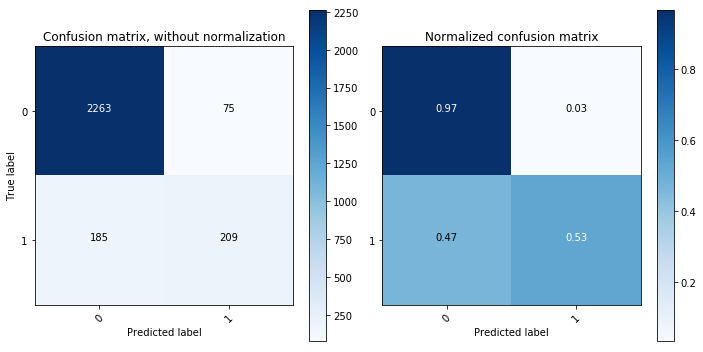

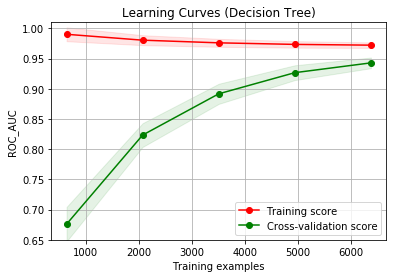

In [32]:
tree_depth = 10

clf_all = DecisionTreeClassifier(random_state = 100, max_depth=tree_depth, class_weight={0:.45, 1:.55})

clf_all.fit(X_train, y_train)
y_pred = clf_all.predict(X_test)

probs = clf_all.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
y_pred = [1 if x > 0.5 else 0 for x in probs]

plot_measures(y_test, y_pred, tree_depth)
print_confusion_matrix(y_test, y_pred)

plot_learning_curve(clf_all, X_All, Y, ylim=(0.65, 1.01), n_jobs=4);

<a href='#top'>Go to top</a>

<a id='section7'></a>
# 7. Communicating Results

With this project, we were able to predict with reasonable accuracy the performance of a email marketing campaign. As we can see in the chart below, the model **predicted that 10.40%** of the customers in the mailing list would respond to the marketing campaign. Based on our test data, **14.42%** of the customers did respond to the campaign.

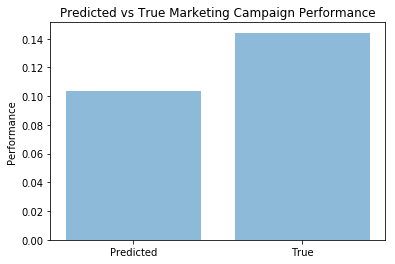

In [33]:
num_customers = len(y_test)
true_response = y_test.sum().values[0]
pred_response = sum(y_pred)

pred_performance = (pred_response/num_customers)
true_performance = (true_response/num_customers)

y_labels = ('Predicted', 'True')
y_pos = np.arange(len(y_labels))
performance = [pred_performance,true_performance]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, y_labels)
plt.ylabel('Performance')
plt.title('Predicted vs True Marketing Campaign Performance')
 
plt.show()

<a href='#top'>Go to top</a>

# Model Implementation

In [13]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from collections import defaultdict
import itertools
from operator import itemgetter
import numpy as np
import os
import graphviz
os.environ["PATH"] += os.pathsep + 'C:/Users/MarceloMendonca/Anaconda3/Library/bin/graphviz'

In [14]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    ylabel = 'True label'
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        ylabel = ''

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.grid(False)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel(ylabel)
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [15]:
def print_split_shapes(X_train, X_test, y_train, y_test):
    print("X_Train: ",X_train.shape)
    print("X_test: ",X_test.shape)
    print("y_train: ",y_train.shape)
    print("y_test: ",y_test.shape)

In [16]:
def print_confusion_matrix(y_test, y_pred):
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.subplot(1, 2, 2)
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                          title='Normalized confusion matrix')

    plt.show()

In [17]:
def print_tree(classifier, features, file_name):
    features_names = features.columns.tolist()
    dot_data = tree.export_graphviz(classifier, out_file=None, 
                          feature_names=features_names,  
                          class_names=['No', 'Yes'],  
                          filled=True, rounded=True,  
                          special_characters=True)  
    graph = graphviz.Source(dot_data)  
    graph.render(file_name) 
    return graph

In [18]:
def get_features_importance(classifier,features_names):
    features_importance = dict(zip(features_names,classifier.feature_importances_))
    return sorted(features_importance.items(), key=itemgetter(1), reverse=True)

In [19]:
def plot_learning_curve(estimator, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    
    title = "Learning Curves (Decision Tree)"
    # Cross validation with 100 iterations to get smoother mean test and train
    # score curves, each time with 30% data randomly selected as a validation set.
    cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=0) 
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("ROC_AUC")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,scoring='roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [20]:
def plot_auc_vs_treedepth(X_train, y_train, X_test, y_test):
    max_depths = np.linspace(1, 32, 32, endpoint=True)
    train_results = []
    test_results = []

    for max_depth in max_depths:
        dt = DecisionTreeClassifier(random_state = 100, max_depth=max_depth)
        dt.fit(X_train, y_train)

        train_pred = dt.predict(X_train)
        roc_auc = roc_auc_score(y_train,train_pred)
        # Add auc score to previous train results
        train_results.append(roc_auc)

        y_pred = dt.predict(X_test)
        roc_auc = roc_auc_score(y_test,y_pred)
        # Add auc score to previous test results
        test_results.append(roc_auc)

    line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
    line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
    plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
    plt.ylabel('AUC score')
    plt.xlabel('Tree depth')
    plt.show()
    
    index, value = max(enumerate(test_results), key=itemgetter(1))
    return index+1

In [30]:
def plot_measures(y_test, y_pred, tree_depth):
    
    measures_dict = {}
    
    cm = confusion_matrix(y_test, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    tn, fp, fn, tp = cm.ravel()
    
    measures_dict['1. Accuracy'] = accuracy_score(y_test,y_pred)
    measures_dict['2. F1_Score'] = f1_score(y_test,y_pred)
    measures_dict['3. Precision'] = precision_score(y_test,y_pred)
    measures_dict['4. Recall'] = recall_score(y_test,y_pred)
    measures_dict['5. ROC_AUC'] = roc_auc_score(y_test,y_pred)
    
    measures_dict['6. True Negative'] = tn
    measures_dict['7. False Positive'] = fp
    measures_dict['8. False Negative'] = fn
    measures_dict['9. True Positive'] = tp 
    measures_dict['* Tree Depth'] = tree_depth
    
    print("Using tree depth = ", tree_depth)
    print("Accuracy is ", measures_dict['1. Accuracy'])
    print("f1_score is ", measures_dict['2. F1_Score'])
    print("Precision Score is ", measures_dict['3. Precision'])
    print("Recall Score is ", measures_dict['4. Recall'])
    print("Area Under the Receiver Operating Characteristic Curve (ROC AUC) is ", measures_dict['5. ROC_AUC'])    

#### Preparing the Data

In [23]:
Y = df[['Response']].replace({'No': 0, 'Yes': 1})
X = df.drop(['Response','Customer ID'], axis=1)

class_names = Y.Response.unique()

In [24]:
X_Cat = X.select_dtypes(include=['object'])
X_Num = X.select_dtypes(exclude=['object'])

In [25]:
X_Cat = pd.get_dummies(X_Cat)

In [26]:
X_All = pd.concat([X_Num, X_Cat], axis=1)
X_All.head(2)

,Income (USD),Customer Lifetime Value (USD),Monthly Premium Auto (USD),Number of Policies,Months Since Policy Inception,Months Since Last Claim,Number of Open Complaints,Total Claim Amount (USD),State_Arizona,State_California,...,Renew Offer Type_Offer4,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,56274,2763.519279,69,1,5,32,0,384.811147,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,6979.535903,94,8,42,13,0,1131.464935,1,0,...,0,1,0,0,0,0,0,0,1,0


In [27]:
X_train, X_test, y_train, y_test = train_test_split( X_All, Y, test_size = 0.3, random_state = 100)

print_split_shapes (X_train, X_test, y_train, y_test)

X_Train:  (6372, 63)
X_test:  (2732, 63)
y_train:  (6372, 1)
y_test:  (2732, 1)


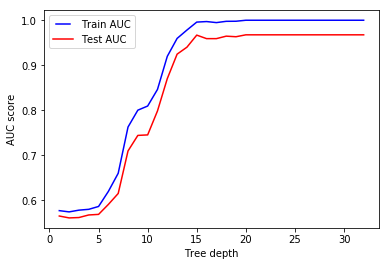

In [28]:
plot_auc_vs_treedepth(X_train, y_train, X_test, y_test);

In [36]:
print("The model predicted a performance of {:.2%} and the true performance was {:.2%}.".format(pred_performance, true_performance))

The model predicted a performance of 10.40% and the true performance was 14.42%.


In [34]:
get_features_importance(clf_all,X_train.columns)

[('Employment Status_Retired', 0.15382186309719584),
 ('Months Since Policy Inception', 0.1251002040843132),
 ('Income (USD)', 0.10305901744790419),
 ('Total Claim Amount (USD)', 0.09749597857343716),
 ('Customer Lifetime Value (USD)', 0.08971395387052944),
 ('Months Since Last Claim', 0.07720422786811623),
 ('Monthly Premium Auto (USD)', 0.07411474203984805),
 ('Renew Offer Type_Offer2', 0.060600415819483666),
 ('Renew Offer Type_Offer1', 0.0336674376912823),
 ('Marital Status_Single', 0.01947356983800835),
 ('Marital Status_Married', 0.015976867633932957),
 ('Sales Channel_Agent', 0.014461442693488391),
 ('Gender_F', 0.014246639570212933),
 ('Location Code_Suburban', 0.013971221521888417),
 ('Education_Master', 0.010126425189833518),
 ('Vehicle Size_Small', 0.009846311422270245),
 ('Renew Offer Type_Offer3', 0.009636882248456704),
 ('Renew Offer Type_Offer4', 0.007982952907956361),
 ('Marital Status_Divorced', 0.007310053831152832),
 ('Number of Policies', 0.007179981195222897),
 ('V

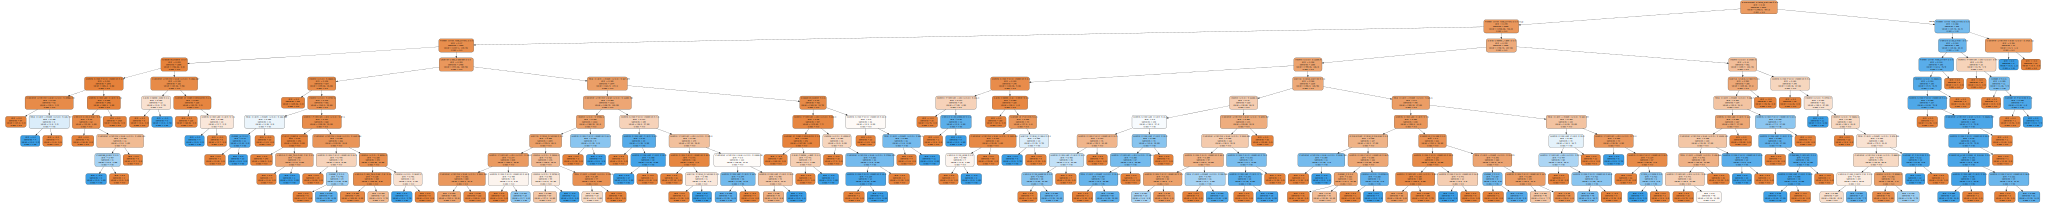

In [35]:
print_tree(clf_all, X_train, "PacificWest_All")